In [1]:
import os, sys
__dir__ = os.path.dirname(os.path.abspath(""))
sys.path.append(__dir__), sys.path.append(os.path.abspath(os.path.join(__dir__, "..")))
from libs import *

from matplotlib import pyplot as plt
from generate import Generator

Global seed set to 23


In [30]:
generator = Generator("../ckps/H-D/MSK_val/best-MSK.ptl")
generator2=Generator("../ckps/H-D/DMF/GS-last.ptl")

In [31]:
image_files = [
    "samples/MSK/ISIC_0009883.jpeg", 
    "samples/MSK/ISIC_0009922.jpeg", 
    "samples/MSK/ISIC_0009928.jpeg", 
    "samples/MSK/ISIC_0009962.jpeg", 
    "samples/MSK/ISIC_0011333.jpeg",
    "samples/MSK/ISIC_0014845.jpeg", 
    "samples/MSK/ISIC_0011636.jpeg", 
    "samples/MSK/1.jpeg",
    "samples/MSK/8.jpeg",
    "samples/MSK/15.jpeg",
]

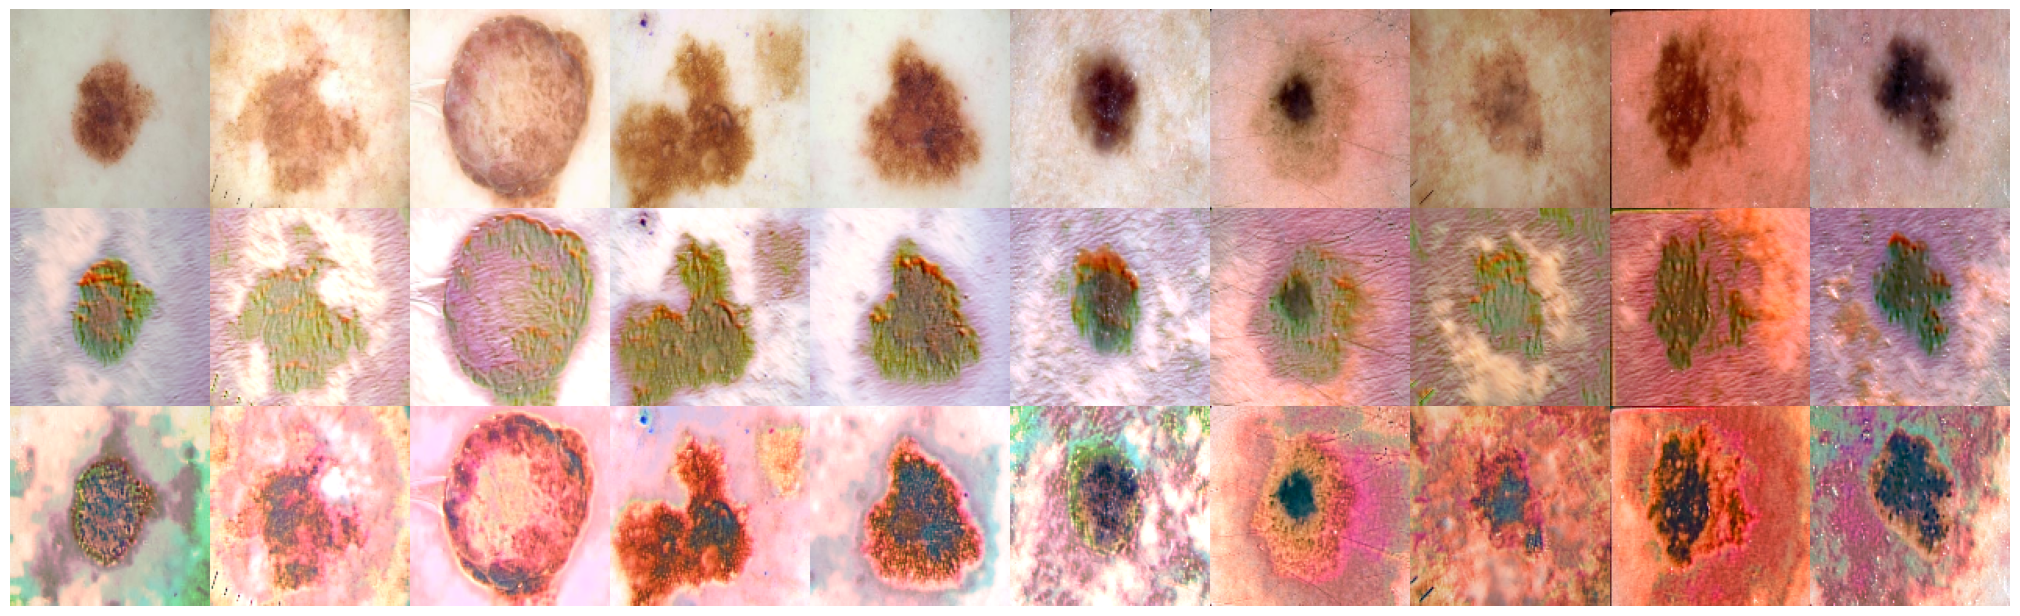

In [32]:
# Define a fixed size for the images
IMG_SIZE = (128, 128)

# Create a figure with the desired size
fig = plt.figure(figsize=(20, 6))

for i, image_file in enumerate(image_files):
    # Read the image
    image = cv2.imread(image_file)
    image = cv2.cvtColor(
        image, 
        code = cv2.COLOR_BGR2RGB, 
    )
    
    # Resize the image to a fixed size
    image = cv2.resize(image, IMG_SIZE)
    
    # Generate images using the first generator
    generated_image = generator.generate(image)
    
    # Resize the generated image to the same size as the input image
    generated_image = cv2.resize(generated_image, image.shape[:2])
    
    # Generate images using the second generator
    generated_image2 = generator2.generate(image)
    
    # Resize the generated image to the same size as the input image
    generated_image2 = cv2.resize(generated_image2, image.shape[:2])
    
    # Plot the images
    plt.subplot(3, 10, i + 1); plt.imshow(image); plt.axis("off"); 
    plt.subplot(3, 10, i + 11); plt.imshow(generated_image); plt.axis("off"); 
    plt.subplot(3, 10, i + 21); plt.imshow(generated_image2); plt.axis("off"); 

# Adjust the spacing between the subplots
#plt.subplots_adjust(hspace=-0.8, wspace=0.1)

# Save the figure
fig.tight_layout(pad=0)
fig.savefig("samples/results/MSKsamples_new.jpg", bbox_inches='tight', pad_inches=0)
